#Logistic Regression

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Question 1
####학생들의 이전 기록 데이터를 불러와 train_data에 저장하기

In [65]:
#content/drive/MyDrive/ml 구글 드라이브 안에 넣고 구글 colab에서 작업
train_data = np.loadtxt("/content/drive/MyDrive/ml/ex2data1.txt", delimiter=',')
print(train_data)

[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]
 [95.86155507 38.22527806  0.        ]
 [75.01365839 30.60326323  0.        ]
 [82.30705337 76.4819633   1.        ]
 [69.36458876 97.71869196  1.        ]
 [39.53833914 76.03681085  0.        ]
 [53.97105215 89.20735014  1.        ]
 [69.07014406 52.74046973  1.        ]
 [67.94685548 46.67857411  0.        ]
 [70.66150955 92.92713789  1.        ]
 [76.97878373 47.57596365  1.        ]
 [67.37202755 42.83843832  0.        ]
 [89.67677575 65.79936593  1.        ]
 [50.53478829 48.85581153  0.        ]
 [34.21206098 44.2095286   0.        ]
 [77.92409145 68.97235999  1.        ]
 [62.27101367 69.95445795

###Question 2
####데이터가 어떻게 분포되어 있는지 확인하기

In [66]:
X = train_data[:, 0:2]
y = train_data[:, 2, np.newaxis]
#print(X)
print(X.shape)
#print(y)
print(y.shape)

(100, 2)
(100, 1)


In [67]:
import matplotlib
import matplotlib.pyplot as plt

def plot_data(X,y):
  pos = np.argwhere(y==1)
  neg = np.argwhere(y==0)

  plt.plot(X[pos,0], X[pos,1], linestyle='', marker='^', color='b')
  plt.plot(X[neg,0], X[neg,1], linestyle='', marker='s', color='y')

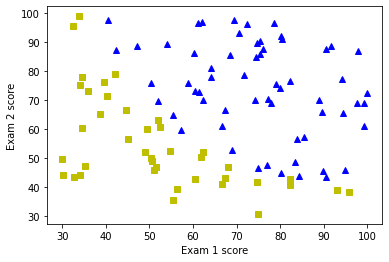

In [68]:
plt.figure()
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plot_data(X,y)

plt.show()

###Question 3
####Sigmoid function 구현하기

In [69]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

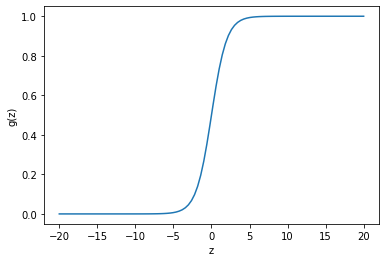

In [70]:
def plot_sigmoid():
  x = np.linspace(-20, 20, 100)
  plt.plot(x, np.vectorize(sigmoid)(x))
  plt.xlabel('z')
  plt.ylabel('g(z)')

plot_sigmoid()

###Question 4
logistic regression에 대한 cost function을 log-likelihood를 사용하여 구하기

In [71]:
def cost_function(params, train_data, train_labels):   #log-likelihood 
  m = train_data.shape[0]
  theta = params
  X = train_data
  y = train_labels

  h = sigmoid(np.dot(X, theta))
  cost = (1/m)*np.sum((-y*np.log(h))-((1-y)*np.log(1-h)))

  return cost

In [72]:
x = train_data[:, :2]
X = np.concatenate((np.ones((train_data.shape[0],1)),x), axis=1)
y = train_data[:, 2, np.newaxis]

In [73]:
def test_cost_function():
  theta = np.zeros((X.shape[1], 1))
  initial_cost = cost_function(theta, X, y)
  
  print("Expected initial cost with 0-value parameters: 0.69.")
  print("Your cost function returns %.2f."%initial_cost)

  test_theta = np.array([0.09, 0.44, -0.33]).reshape((3,1))
  test_cost = cost_function(test_theta, X, y)

  print("Expected initial cost with parameters [0.09, 0.44, -0.33]:3.57.")
  print("Your cost function returns %.2f."%test_cost)

test_cost_function()

Expected initial cost with 0-value parameters: 0.69.
Your cost function returns 0.69.
Expected initial cost with parameters [0.09, 0.44, -0.33]:3.57.
Your cost function returns 3.57.


###Question 5
####Gradient descent algorithm을 구현하여 모델의 파라미터를 찾고, graadient descent 과정에서 cost function의 변화를 그래프로 출력하기
(업데이트 횟수 nither=500, learning rate alpha=0.001)

In [74]:
def gradient(theta, train_data, train_labels):
  m = train_data.shape[0]
  X = train_data
  y = train_labels

  h = sigmoid(np.dot(X, theta))
  gradient = (1/m)*(h-y).T.dot(X)

  return gradient

In [75]:
def compute_gradient_descent(theta, train_data, train_labels, alpha=0.01, nither=1500):
  costs = []
  
  for i in range(nither):
    cost = cost_function(theta, train_data, train_labels)
    costs.append(cost)

    g = gradient(theta, train_data, train_labels)
    new_theta = theta - alpha*(g.T)
    theta = new_theta

  return new_theta, costs

In [76]:
x = train_data[:, :2]
X = np.concatenate((np.ones((train_data.shape[0],1)), x), axis=1)
y = train_data[:, 2, np.newaxis]

Expected gradient: [-0.10, -12.01, -11.26]
Your gradient result: [-0.10, -12.01, -11.26]
Expected model parameters: [-0.03, 0.01, 0.00]
Your model parameters: [-0.03, 0.01, 0.00]


Text(0.5, 1.0, 'cost function by iteration')

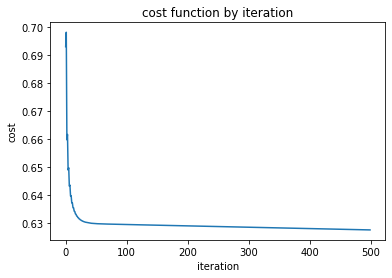

In [77]:
NITER = 500
ALPHA = 0.001

print("Expected gradient: [-0.10, -12.01, -11.26]")
print('Your gradient result: [%.2f, %.2f, %.2f]' % tuple(gradient(np.zeros((3, 1)), X, y).T))

zero_theta = np.zeros((X.shape[1], 1))
new_theta, costs = compute_gradient_descent(zero_theta, X, y, ALPHA, NITER)

print("Expected model parameters: [-0.03, 0.01, 0.00]")
print('Your model parameters: [%.2f, %.2f, %.2f]' % tuple(*new_theta.T))

plt.plot(range(NITER), costs)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("cost function by iteration")

###Question 6
####주어진 데이터의 클래스를 구분하는 선(decision boundary)을 구하고, 데이터와 함께 그려서 해당 선을 기준으로 데이터가 적절히 구분되는지 확인하기. 
####데이터가 제대로 구분지어지지 않는다면, gradient decision의 iteration을 100000로 늘려 시도하기.

In [78]:
def decision_boundary(params, xrange):
  x_value = np.array([np.min(X[:,1]), np.max(X[:,1])])
  y_value = -(params[0]+params[1]*x_value)/params[2]

  plt.plot(x_value, y_value, "b")
  xx = train_data[:, 0:2]
  yy = train_data[:, 2, np.newaxis]
  plot_data(xx,yy)

In [79]:
new_theta_500, _ = compute_gradient_descent(zero_theta, X, y, ALPHA, 500)
new_theta_100000, _ = compute_gradient_descent(zero_theta, X, y, ALPHA, 100000)

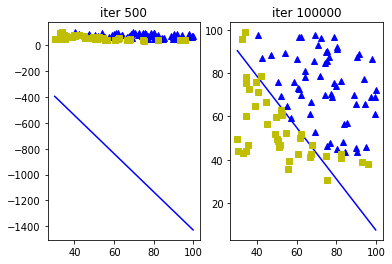

In [80]:
ax = plt.subplot(121)
ax.set_title('iter 500')
decision_boundary(new_theta_500.flatten(), [30, 100])

ax = plt.subplot(122)
ax.set_title('iter 100000')
decision_boundary(new_theta_100000.flatten(), [30, 100])

###Question 7
####Newton's Method로 모델의 파라미터를 찾아보기.
####각 iteration에서 cost function이 어떻게 변하는지 그래프로 그려 확인해보기.
####Question 4에서 구한 cost function의 변화와 어떻게 다른지 확인해보기.
####찾은 파라미터로 decision boundary를 question 5에서처럼 그려서 확인해보기.

In [88]:
#gradient
def newton_grad(theta, train_data, train_label):
  X = train_data
  y = train_label
  epsilon = 10**(-5)
  g = np.zeros((3,1))

  for i in range(3):
    theta1 = theta.copy()
    theta2 = theta.copy()

    theta1[i] = theta[i] + epsilon
    theta2[i] = theta[i] - epsilon
    
    g[i] = (cost_function(theta1, X, y) - cost_function(theta2, X, y))/(2*epsilon)

  return g

In [89]:
#hessian_matrix
def newton_hessian(theta, train_data, train_label):
  X = train_data
  y = train_label
  epsilon = 10**(-5)
  hessian = np.zeros((3,3))

  for i in range(3):
    
    for j in range(3):
      theta1 = theta.copy()
      theta2 = theta.copy()
      theta3 = theta.copy()
      theta4 = theta.copy()
      
      if i < j:
        theta1[i] = theta[i] + epsilon
        theta2[i] = theta[i] + epsilon
        theta3[i] = theta[i] - epsilon
        theta4[i] = theta[i] - epsilon

        theta1[j] = theta[j] + epsilon
        theta2[j] = theta[j] - epsilon
        theta3[j] = theta[j] + epsilon
        theta4[j] = theta[j] - epsilon

        hessian[i,j] = (cost_function(theta1, X, y) - cost_function(theta2, X, y) - cost_function(theta3, X, y) + cost_function(theta4, X, y))/(4*(epsilon**2))
      
      elif i == j:
        theta1[i] = theta[i] + epsilon
        theta2[i] = theta[i] - epsilon

        hessian[i,j] = (cost_function(theta1, X, y) + cost_function(theta2, X, y) - 2*cost_function(theta, X, y))/(epsilon**2)

      else:
        hessian[i,j] = hessian[j,i]

  return hessian

In [90]:
from numpy.linalg import inv

def newton_method(theta, train_data, train_label):
  gradient = newton_grad(theta, train_data, train_label)
  hessian = newton_hessian(theta, train_data, train_label)
  hessian_matrix = np.linalg.inv(hessian)
  theta = theta - np.dot(hessian_matrix, gradient)

  return theta  

In [91]:
niter = 10
newton_costs = []
theta = zero_theta
for i in range(niter):
  new_theta = newton_method(theta, X, y)
  cost = cost_function(new_theta, X, y)
  newton_costs.append(cost)
  theta = new_theta

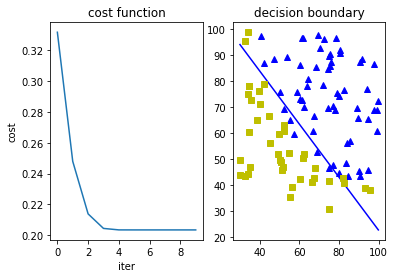

In [92]:
ax = plt.subplot(121)
ax.plot(range(niter), newton_costs)
ax.set_title("cost function")
ax.set_xlabel("iter")
ax.set_ylabel("cost")

ax = plt.subplot(122)
ax.set_title("decision boundary")
decision_boundary(new_theta.flatten(), [30,100])

###Question 8
#### Regularization을 사용해서 다음 모델을 주어진 데이터(traindata.txt)에 맞춰 학습해보기. 
####Regularization parameter를 변화하여 주어진 다양한 모델을 만들어보고, 추가된 테스트 데이터(testdata.txt)에 대해서 정확도가 어떻게 되는지 그래프를 그려서 확인해보기.

In [93]:
def gen_X(x, n_feature = 5):
  data = [np.ones(x.shape)]
  for i in range(5):
    data.append(np.power(x, i+1))
  return np.stack(data, axis=-1)

In [94]:
def cost_function(theta, X, y, reg_param = 250):
  m = y.shape[0]
  theta = theta[:, np.newaxis]        #theta.shape = (6, 1)
  h = np.dot(X, theta)

  #cost
  c = np.sum((h-y)**2)
  r = np.sum(theta[1:]**2)
  cost = (1/2*m)*(c + reg_param*r)
  
  #gradient
  gradient = (1/m)*(((h-y).T.dot(X)) + reg_param*theta.T)
  gradient[0,0] = (1/m)*((h-y).T.dot(X[:, 0]))
  
  return cost, gradient.flatten()

In [95]:
train_data = np.loadtxt("/content/drive/MyDrive/ml/traindata.txt", delimiter=',')
test_data = np.loadtxt("/content/drive/MyDrive/ml/testdata.txt", delimiter=',')

In [96]:
X = gen_X(train_data[:, 0], 5)     #train_data[:, 0]은 x_train, X.shape = (10, 6)
y = train_data[:, 1, np.newaxis]   #train_data[:, 1]은 y_train, y.shape = (10, 1)

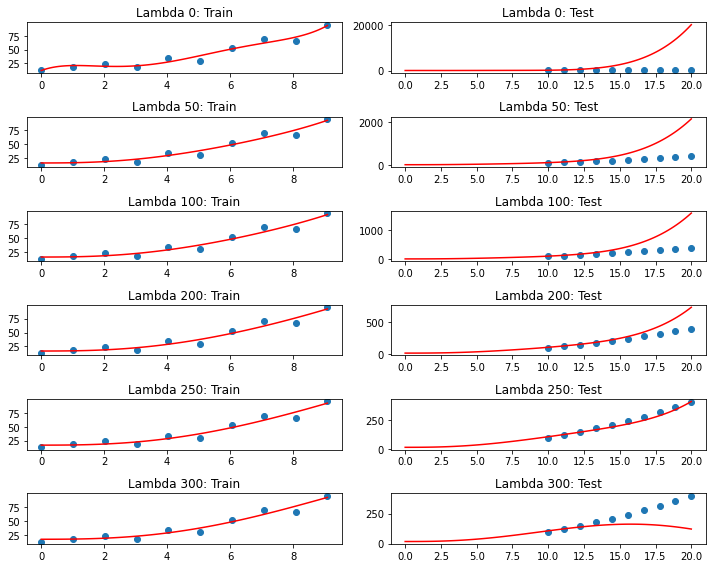

In [97]:
from scipy import optimize

options = {'maxiter':1000}
n = X.shape[1]

regular_params = [0, 50, 100, 200, 250, 300]
fig, axes = plt.subplots(len(regular_params), 2, figsize=(10, 8))

for idx, rp in enumerate(regular_params):
    res = optimize.minimize(cost_function, np.zeros(n), (X, y, rp), jac=True, method='TNC', options=options)
    cost = res.fun
    theta = res.x

    # Plot train data
    ax = axes[idx][0]
    ax.set_title('Lambda %d: Train' % rp)
    ax.scatter(X[:,1], y)

    x_0 = np.linspace(0, max(train_data[:,0]), 100)
    X_0 = gen_X(x_0)
    ax.plot(x_0, np.dot(X_0, theta.reshape((theta.shape[0], 1))), 'r')


    # Plot test data
    X_test = gen_X(test_data[:, 0], 5)
    y_test = test_data[:, 1, np.newaxis]

    ax = axes[idx][1]
    ax.set_title('Lambda %d: Test' % rp)
    ax.scatter(X_test[:, 1], y_test)

    x_test = np.linspace(0, max(X_test[:, 1]), 100)
    X_test_lin = gen_X(x_test)
    ax.plot(X_test_lin[:, 1], np.dot(X_test_lin, theta.reshape((theta.shape[0], 1))), 'r')

fig.tight_layout()

regularization을 사용하지 않았을 때(lambda= 0)출력된 그래프를 분석해보면, train data에 대해서는 모델이 적절하게 그려지는 것을 확인할 수 있지만, test data에 대해서는 모델이 적절하게 그려지지 않는 것으로 보아 overfitting이 일어남을 확인할 수 있다. 

regularization을 사용한 그 아래 그래프들을 분석해보면, lambda 값이 50, 100, 200으로 점차 커짐에 따라 test data에 대한 모델도 비교적 적절하게 그려지는 모습을 확인할 수 있다.

lambda값이  250일 때 모델이 가장 test data에 대해서 가장 적절하게 그려지는 것을 확인할 수 있다.

lambda 값이 300일 때의 그래프를 보면, train data에 대해서는 모델이 적절하게 그려지는 반면, test data에 대해서는 모델이 적절하게 그려지지 못한 것으로 보아 underfitting이 일어남을 확인할 수 있다.

regularization은 이처럼 feature의 영향을 줄이는 방향으로 최적화하여준다. theta 값에 regularization parameter를 곱하여 모델에 주는 영향을 줄여서 모델이 train data에 지나치게 학습되는, 즉 overfitting을 막는 역할을 한다. 